# Importing Libraries

In [32]:
import pandas as pd
import numpy as np

# DTM (document-term-matrix)
from sklearn.feature_extraction.text import CountVectorizer

# Impartirea documentului in cuvinte
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Grafice
import matplotlib.pyplot as plt

# WordCloud
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Citirea Datelor

In [33]:
url = 'https://github.com/berinde/curs-analiza-datelor-complexe/blob/main/data/input/2.input_data_prepped.csv?raw=True'
reviews = pd.read_csv(url)
reviews.head(2)

,rest_id,text,rating,char_count,positive,text_prep
0,yGMCl0vYigshkXiZFIDTNw,We arrived for our reservation at 7:15pm. The...,4,302,1,arrived reservation pm seat -PRON- right time ...
1,yGMCl0vYigshkXiZFIDTNw,We received amazing service again. The food wa...,5,111,1,receive amazing service food cook right waitre...


In [34]:
# len(reviews)
reviews.shape

(9365, 6)

In [35]:
reviews.dtypes

rest_id       object
text          object
rating         int64
char_count     int64
positive       int64
text_prep     object
dtype: object

In [36]:
# Numarul valorilor nule pentru fiecare coloana
reviews.isnull().sum()

rest_id       0
text          0
rating        0
char_count    0
positive      0
text_prep     1
dtype: int64

In [37]:
# reviews[reviews['text_prep'].isnull()]

In [38]:
reviews['text_prep'] = reviews['text_prep'].astype(str)

In [39]:
reviews.isnull().sum()

rest_id       0
text          0
rating        0
char_count    0
positive      0
text_prep     0
dtype: int64

# Document Term Matrix

In [40]:
# Construim un vocabular cu cele mai frecvente 6000 de cuvinte
vec = CountVectorizer(max_features=6000)

# Cream DTM-ul
dtm1 = vec.fit_transform(reviews['text_prep'])

# Convertim in dataframe
dtm = pd.DataFrame(dtm1.toarray(),
                   columns=vec.get_feature_names_out())

In [41]:
dtm.head(5)

,aaabar,aaron,abacus,ability,able,absolute,absolutely,absurd,abundance,abundant,...,zero,zesty,zillion,zipps,ziti,zoe,zone,zucchini,zuchinni,zupa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
reviews['text_prep'].iloc[1000]

'never disappointing meal ever menu always fresh delicious authentic food worth bragging service robbie absolute favorite server location addition make dining experience amazing know thing two essentially sommeli wine pairing love place thank carabbas'

In [43]:
# Cuvantul 'never' apare o singura data in recenzia #1000
dtm['never'].iloc[1000]

1

In [44]:
# Cuvantul 'robbie' nu este in top 6000 de cuvinte,
# din aceasta cauza nu exista coloana robbie in dtm
# dtm['robbie'].iloc[1000]

In [45]:
reviews.head(2)

,rest_id,text,rating,char_count,positive,text_prep
0,yGMCl0vYigshkXiZFIDTNw,We arrived for our reservation at 7:15pm. The...,4,302,1,arrived reservation pm seat -PRON- right time ...
1,yGMCl0vYigshkXiZFIDTNw,We received amazing service again. The food wa...,5,111,1,receive amazing service food cook right waitre...


In [46]:
reviews['text_prep_tokens'] = reviews['text_prep'].apply(word_tokenize)
reviews['word_len_prep'] = reviews['text_prep_tokens'].apply(len)
reviews.head()

,rest_id,text,rating,char_count,positive,text_prep,text_prep_tokens,word_len_prep
0,yGMCl0vYigshkXiZFIDTNw,We arrived for our reservation at 7:15pm. The...,4,302,1,arrived reservation pm seat -PRON- right time ...,"[arrived, reservation, pm, seat, -PRON-, right...",27
1,yGMCl0vYigshkXiZFIDTNw,We received amazing service again. The food wa...,5,111,1,receive amazing service food cook right waitre...,"[receive, amazing, service, food, cook, right,...",10
2,yGMCl0vYigshkXiZFIDTNw,Breakfast was delicious and waitress was aweso...,5,146,1,breakfast delicious waitress awesome steak egg...,"[breakfast, delicious, waitress, awesome, stea...",15
3,yGMCl0vYigshkXiZFIDTNw,"We have eaten here twice, for lunch. The first...",4,710,1,eaten twice lunch first time french dip mom fi...,"[eaten, twice, lunch, first, time, french, dip...",75
4,yGMCl0vYigshkXiZFIDTNw,"awesome service, great food. Buffy was an ama...",5,59,1,awesome service great food buffy amazing server,"[awesome, service, great, food, buffy, amazing...",7


In [47]:
# Cele top 6000 de cuvinte din DTM
top6000 = vec.get_feature_names_out()
print(len(top6000))

6000


In [48]:
# Cream o noua coloaana, care contine doar cuvintele din cele
# top 6000 de cuvinte
reviews['text_prep_lim_tokens'] = reviews['text_prep_tokens'].apply(lambda x:
                                                                    [cuvant for cuvant in x if cuvant in top6000])
reviews.head(2)

,rest_id,text,rating,char_count,positive,text_prep,text_prep_tokens,word_len_prep,text_prep_lim_tokens
0,yGMCl0vYigshkXiZFIDTNw,We arrived for our reservation at 7:15pm. The...,4,302,1,arrived reservation pm seat -PRON- right time ...,"[arrived, reservation, pm, seat, -PRON-, right...",27,"[arrived, reservation, pm, seat, right, time, ..."
1,yGMCl0vYigshkXiZFIDTNw,We received amazing service again. The food wa...,5,111,1,receive amazing service food cook right waitre...,"[receive, amazing, service, food, cook, right,...",10,"[receive, amazing, service, food, cook, right,..."


In [49]:
reviews['word_len_prep_lim'] = reviews['text_prep_lim_tokens'].apply(len)
reviews.head(2)

,rest_id,text,rating,char_count,positive,text_prep,text_prep_tokens,word_len_prep,text_prep_lim_tokens,word_len_prep_lim
0,yGMCl0vYigshkXiZFIDTNw,We arrived for our reservation at 7:15pm. The...,4,302,1,arrived reservation pm seat -PRON- right time ...,"[arrived, reservation, pm, seat, -PRON-, right...",27,"[arrived, reservation, pm, seat, right, time, ...",25
1,yGMCl0vYigshkXiZFIDTNw,We received amazing service again. The food wa...,5,111,1,receive amazing service food cook right waitre...,"[receive, amazing, service, food, cook, right,...",10,"[receive, amazing, service, food, cook, right,...",9


In [50]:
reviews['text_prep_lim'] = reviews['text_prep_lim_tokens'].apply(lambda x: ' '.join(x))
reviews.head(2)

,rest_id,text,rating,char_count,positive,text_prep,text_prep_tokens,word_len_prep,text_prep_lim_tokens,word_len_prep_lim,text_prep_lim
0,yGMCl0vYigshkXiZFIDTNw,We arrived for our reservation at 7:15pm. The...,4,302,1,arrived reservation pm seat -PRON- right time ...,"[arrived, reservation, pm, seat, -PRON-, right...",27,"[arrived, reservation, pm, seat, right, time, ...",25,arrived reservation pm seat right time restura...
1,yGMCl0vYigshkXiZFIDTNw,We received amazing service again. The food wa...,5,111,1,receive amazing service food cook right waitre...,"[receive, amazing, service, food, cook, right,...",10,"[receive, amazing, service, food, cook, right,...",9,receive amazing service food cook right waitre...


# WordCloud

In [51]:
print(dtm.shape)
dtm.head(1)

(9365, 6000)


,aaabar,aaron,abacus,ability,able,absolute,absolutely,absurd,abundance,abundant,...,zero,zesty,zillion,zipps,ziti,zoe,zone,zucchini,zuchinni,zupa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
word_cloud_frecventa = dtm.sum(axis=0)
word_cloud_frecventa

aaabar        4
aaron        11
abacus        5
ability       9
able        159
           ... 
zoe           9
zone          5
zucchini     20
zuchinni      3
zupa          5
Length: 6000, dtype: int64

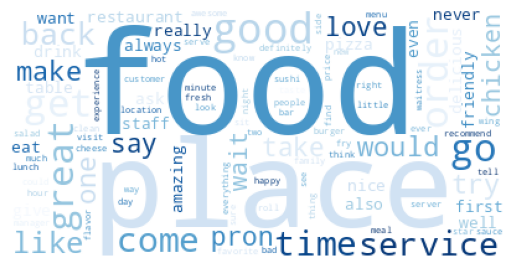

In [53]:
wordcloud = WordCloud(background_color='white',
                      max_words=100,
                      colormap='Blues')
wordcloud.generate_from_frequencies(word_cloud_frecventa)
plt.imshow(wordcloud)
plt.axis('off');

In [74]:
reviews['text'].iloc[0]


"We arrived for our reservation at 7:15pm.  They seated us right on time.  The resturant was fairly loud at first but once the family dinner croed cleared out at 7:30pm it quieted down.  The food and service was outstanding, and at a very reasonable price.  I highly recommend Mimi's very a late dinner."

# Word Cloud Negativ - Top 30

In [64]:
reviews.shape

(9365, 11)

In [65]:
dtm.shape

(9365, 6000)

In [66]:
# DTM doar cu recenziile negative
dtm_pos = dtm[reviews['positive']==0].copy()
dtm_pos.shape

(2839, 6000)

In [67]:
# Frecventa cuvintelor din recenziile negative
word_cloud_frecventa_pos = dtm_pos.sum(axis=0)
word_cloud_frecventa_pos

aaabar       0
aaron        1
abacus       1
ability      4
able        59
            ..
zoe          4
zone         1
zucchini     9
zuchinni     0
zupa         2
Length: 6000, dtype: int64

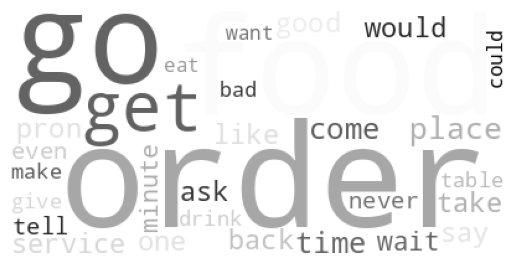

In [72]:
wordcloud_pos = WordCloud(background_color='white',
                      max_words=30,
                      colormap='gray')
wordcloud_pos.generate_from_frequencies(word_cloud_frecventa_pos)
plt.imshow(wordcloud_pos)
plt.axis('off');

In [59]:
wordcloud_pos.words_

{'order': 1.0,
 'food': 0.999198717948718,
 'go': 0.8950320512820513,
 'get': 0.8858173076923077,
 'place': 0.657051282051282,
 'come': 0.6233974358974359,
 'time': 0.6213942307692307,
 'say': 0.5420673076923077,
 'would': 0.5212339743589743,
 'service': 0.5120192307692307,
 'back': 0.4911858974358974,
 'like': 0.48998397435897434,
 'good': 0.4823717948717949,
 'pron': 0.4639423076923077,
 'take': 0.46033653846153844,
 'ask': 0.44871794871794873,
 'one': 0.43990384615384615,
 'wait': 0.40625,
 'minute': 0.37099358974358976,
 'even': 0.32892628205128205,
 'never': 0.3249198717948718,
 'tell': 0.32211538461538464,
 'table': 0.32011217948717946,
 'make': 0.3137019230769231,
 'drink': 0.3076923076923077,
 'give': 0.3072916666666667,
 'bad': 0.30649038461538464,
 'eat': 0.2880608974358974,
 'want': 0.27884615384615385,
 'could': 0.265625}

Tema 1 (10% din nota finala)
*   Creati un wordcloud pentru top 20 de cuvinte din recenziile negative
*   File - Download - Download .py
*   Deadline: 12 Mar



# Frecventa Cuvintelor

In [73]:
type(word_cloud_frecventa)

pandas.core.series.Series

In [61]:
frecventa_cuvinte = pd.DataFrame(word_cloud_frecventa,
                                 columns=['Frecventa']).reset_index()
frecventa_cuvinte.head(2)

,index,Frecventa
0,aaabar,4
1,aaron,11


In [62]:
top10 = frecventa_cuvinte.sort_values(by='Frecventa',
                                      ascending=False).head(10)
top10

,index,Frecventa
2034,food,6838
3947,place,5611
2236,good,5592
2224,go,4716
3641,order,4593
2189,get,4524
2282,great,4275
5414,time,3707
1077,come,3706
4705,service,3559


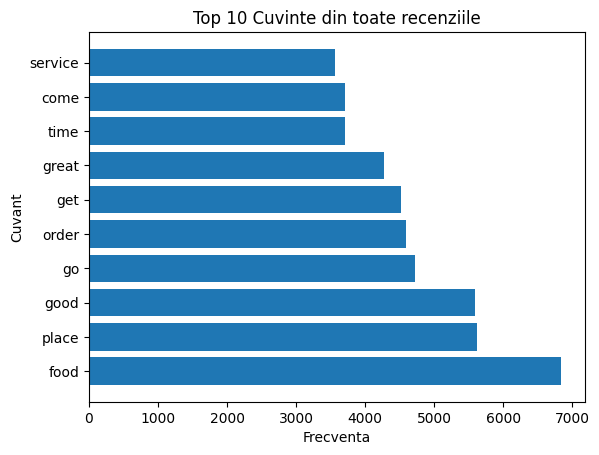

In [63]:
plt.barh(y=top10['index'],
         width=top10['Frecventa'])
plt.title('Top 10 Cuvinte din toate recenziile')
plt.xlabel('Frecventa')
plt.ylabel('Cuvant')
plt.show()

# Lungimea cuvantului

In [75]:
frecventa_cuvinte['lungime_cuvant'] = frecventa_cuvinte['index'].apply(len)
frecventa_cuvinte.head()

,index,Frecventa,lungime_cuvant
0,aaabar,4,6
1,aaron,11,5
2,abacus,5,6
3,ability,9,7
4,able,159,4


In [76]:
frecventa_cuvinte['lungime_cuvant'].describe()

count    6000.000000
mean        6.230500
std         2.259547
min         2.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        17.000000
Name: lungime_cuvant, dtype: float64

In [77]:
frecventa_cuvinte[frecventa_cuvinte['lungime_cuvant']>=15]

,index,Frecventa,lungime_cuvant
35,acknowledgement,9,15
4131,professionalism,7,15
4288,recommendations,3,15
5120,straightforward,3,15
5639,unprofessionalism,3,17
5878,wienerschnitzel,5,15


In [78]:
frecventa_cuvinte['Frecventa'].describe()

count    6000.000000
mean       63.526833
std       264.137047
min         2.000000
25%         4.000000
50%         9.000000
75%        29.000000
max      6838.000000
Name: Frecventa, dtype: float64

In [79]:
frecventa_cuvinte[frecventa_cuvinte['Frecventa']>=5000]

,index,Frecventa,lungime_cuvant
2034,food,6838,4
2236,good,5592,4
3947,place,5611,5


# Diversitate Lexicala: nr. de cuvinte unice pentru fiecare document

In [80]:
dtm.head(1)

,aaabar,aaron,abacus,ability,able,absolute,absolutely,absurd,abundance,abundant,...,zero,zesty,zillion,zipps,ziti,zoe,zone,zucchini,zuchinni,zupa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
lexical = pd.DataFrame(np.count_nonzero(dtm, axis=1),
                       columns=['Cuvinte Unice'])
lexical.head(2)

,Cuvinte Unice
0,24
1,9


In [82]:
lexical['Cuvinte Totale'] = dtm.sum(axis=1)
lexical.head(2)

,Cuvinte Unice,Cuvinte Totale
0,24,26
1,9,9


In [83]:
reviews['text_prep_lim'].iloc[1]

'receive amazing service food cook right waitress great thank'

In [84]:
lexical.describe()

,Cuvinte Unice,Cuvinte Totale
count,9365.000000,9365.000000
mean,33.804698,40.700587
std,24.834092,36.151073
min,1.000000,1.000000
25%,17.000000,18.000000
50%,27.000000,30.000000
75%,42.000000,50.000000
max,252.000000,411.000000


In [85]:
lexical['positive'] = reviews['positive'].copy()
lexical.head(2)

,Cuvinte Unice,Cuvinte Totale,positive
0,24,26,1
1,9,9,1


In [86]:
lexical.groupby('positive').mean()

,Cuvinte Unice,Cuvinte Totale
positive,,
0,41.686509,52.947164
1,30.375881,35.372970


# Densitate Lexicala: nr. de cuvinte unice / totale

In [87]:
lexical['densitate'] = lexical['Cuvinte Unice'] / lexical['Cuvinte Totale']
lexical.head(2)

,Cuvinte Unice,Cuvinte Totale,positive,densitate
0,24,26,1,0.923077
1,9,9,1,1.000000


In [88]:
lexical.groupby('positive').mean()

,Cuvinte Unice,Cuvinte Totale,densitate
positive,,,
0,41.686509,52.947164,0.846257
1,30.375881,35.372970,0.901365
